program to implement multiple regression algoritham using any standard dataset availabele in public domain and find accuracy of the algoritham

In [ ]:
# Multiple Linear Regression 

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Select only two features (0 and 2)
diabetes_X = diabetes_X[:, [0, 2]]
print("Shape of diabetes_X:", diabetes_X.shape)  # (442, 2)

# Split data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# Print the coefficients and intercept
print("Coefficients: \n", regr.coef_)
print("Intercept: \n", regr.intercept_)

# Calculate and print the mean squared error and coefficient of determination
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Extract features from test set for plotting
x = diabetes_X_test[:, 0]  # Feature 0 (Age)
y = diabetes_X_test[:, 1]  # Feature 2 (BMI)



Shape of diabetes_X: (442, 2)
Coefficients: 
 [139.20420118 912.45355549]
Intercept: 
 152.87670001405584
Mean squared error: 2596.60
Coefficient of determination: 0.46


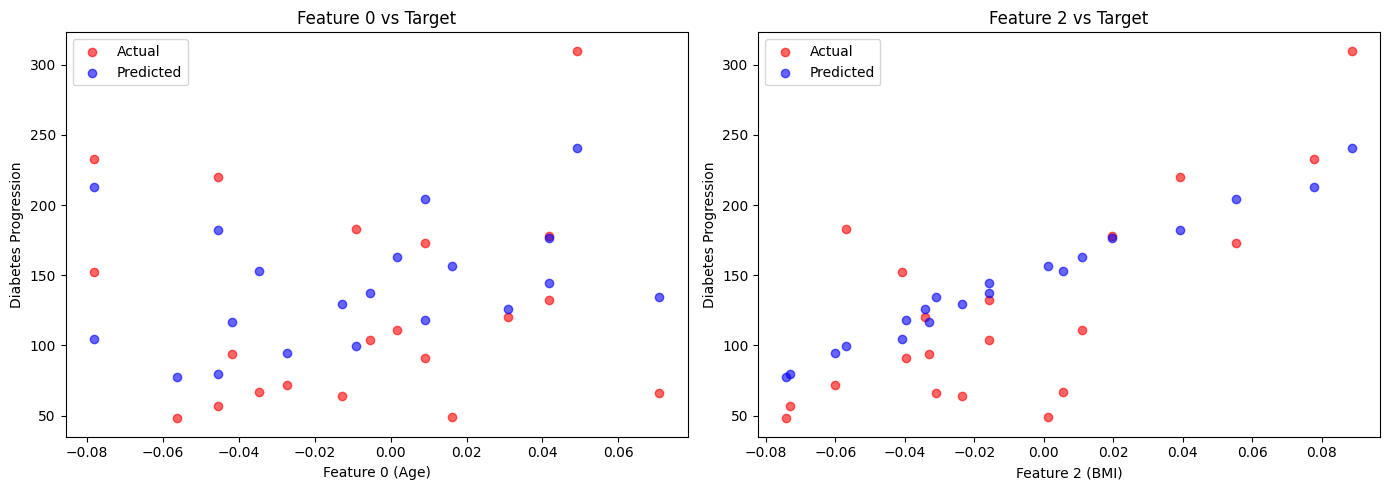

In [5]:
plt.figure(figsize=(14, 5))

# Feature 0 vs Target
plt.subplot(1, 2, 1)
plt.scatter(diabetes_X_test[:, 0], diabetes_y_test, color='red', label='Actual', alpha=0.6)
plt.scatter(diabetes_X_test[:, 0], diabetes_y_pred, color='blue', label='Predicted', alpha=0.6)
plt.xlabel('Feature 0 (Age)')
plt.ylabel('Diabetes Progression')
plt.title('Feature 0 vs Target')
plt.legend()

# Feature 2 vs Target
plt.subplot(1, 2, 2)
plt.scatter(diabetes_X_test[:, 1], diabetes_y_test, color='red', label='Actual', alpha=0.6)
plt.scatter(diabetes_X_test[:, 1], diabetes_y_pred, color='blue', label='Predicted', alpha=0.6)
plt.xlabel('Feature 2 (BMI)')
plt.ylabel('Diabetes Progression')
plt.title('Feature 2 vs Target')
plt.legend()

plt.tight_layout()
plt.show()


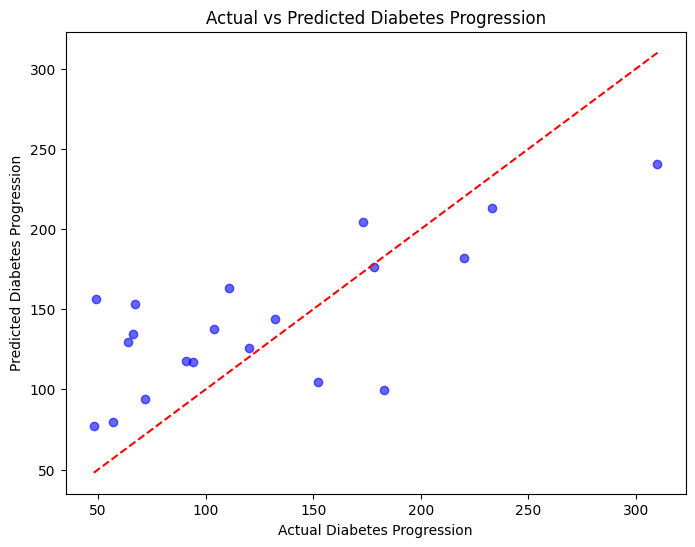

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(diabetes_y_test, diabetes_y_pred, color='blue', alpha=0.6)
plt.plot([diabetes_y_test.min(), diabetes_y_test.max()], [diabetes_y_test.min(), diabetes_y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Diabetes Progression")
plt.ylabel("Predicted Diabetes Progression")
plt.title("Actual vs Predicted Diabetes Progression")
plt.show()


# 3D plot not needed do not write

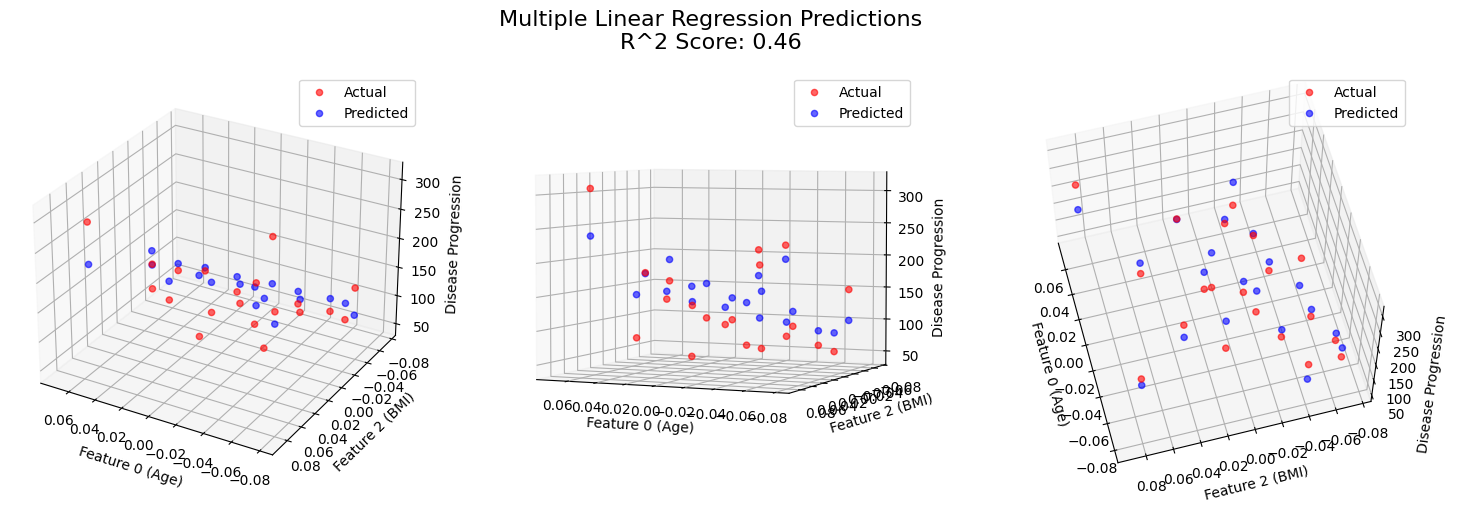

In [7]:
# Plotting predictions from three different 3D angles
plt.style.use('default')

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.scatter(x, y, diabetes_y_test, color='red', label='Actual', alpha=0.6)
    ax.scatter(x, y, diabetes_y_pred, color='blue', label='Predicted', alpha=0.6)
    ax.set_xlabel('Feature 0 (Age)')
    ax.set_ylabel('Feature 2 (BMI)')
    ax.set_zlabel('Disease Progression')
    ax.legend()

# Different viewing angles
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle(f'Multiple Linear Regression Predictions\nR^2 Score: {r2_score(diabetes_y_test, diabetes_y_pred):.2f}', fontsize=16)
plt.tight_layout()
plt.show()
